### OPERATORNORM WITHOUT ADJOINT 

- Creator:  Jonas Bresch, M.Sc
- Date: February 14rd, 2025

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc

import imp

/var/folders/x8/2j6ym0tn7x18f9h9pmv136mc0000gn/T/ipykernel_44693/852982894.py:5: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
  import imp


In [2]:
import adjointfreenorm
imp.reload(adjointfreenorm)

<module 'adjointfreenorm' from '/Users/jonasbresch/Desktop/operator_missmatch/finale/adjointfreenorm.py'>

### Figure 4 - 100x50

iter. 	| func-value 	| residuum  	| sing-vec-error
2000 	|  2.656e+02 	|  5.197e-03 	|  1.956e-05
||A|| =  16.298626428248475
iter. 	| func-value 	| residuum 	| sing-vec-error
2000 	|  1.619e+01 	|  1.039e-01 	|  3.644e-02
||A|| =  16.194917786274203


/usr/local/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


iter. 	| func-value 	| residuum  	| sing-vec-error
2000 	|  2.644e+02 	|  2.082e-02 	|  7.874e-05
||A|| =  16.26109450472525
iter. 	| func-value 	| residuum 	| sing-vec-error
2000 	|  1.609e+01 	|  1.744e-01 	|  3.696e-04
||A|| =  16.087289945080613
iter. 	| func-value 	| residuum  	| sing-vec-error
2000 	|  2.889e+02 	|  5.356e-04 	|  1.854e-06
||A|| =  16.996851371863244
iter. 	| func-value 	| residuum 	| sing-vec-error
2000 	|  1.632e+01 	|  6.797e-01 	|  4.344e-02
||A|| =  16.317153147027163
iter. 	| func-value 	| residuum  	| sing-vec-error
2000 	|  2.912e+02 	|  9.632e-05 	|  3.308e-07
||A|| =  17.063935747695727
iter. 	| func-value 	| residuum 	| sing-vec-error
2000 	|  1.697e+01 	|  9.869e-02 	|  2.680e-02
||A|| =  16.965246198792197
iter. 	| func-value 	| residuum  	| sing-vec-error
2000 	|  2.622e+02 	|  3.630e+00 	|  1.365e-02
||A|| =  16.192984670720424
iter. 	| func-value 	| residuum 	| sing-vec-error
2000 	|  1.628e+01 	|  2.629e-02 	|  5.862e-05
||A|| =  16.2783812670973

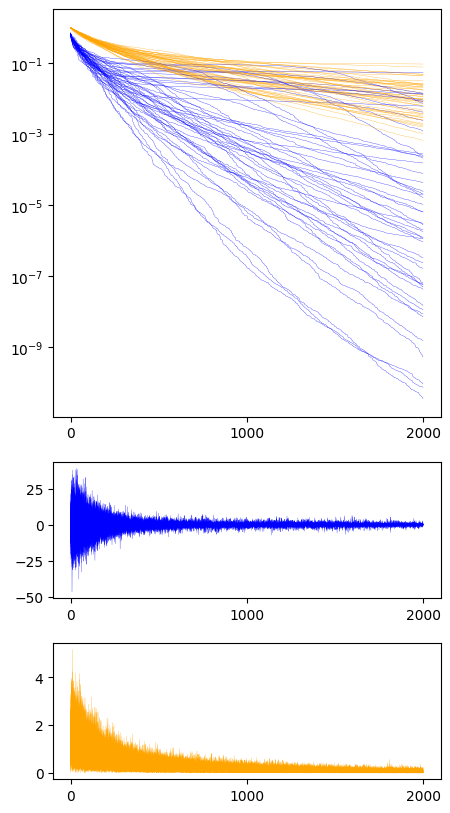

In [3]:
fig, axs = plt.subplots(3, 1, figsize=(5,10), gridspec_kw={'height_ratios': [3, 1, 1]})
for k in range(50):
    A = np.random.randn(100,50)
    V = np.zeros((50,100))
    _, _, vvsol, vvval, _, lista, _ = adjointfreenorm.MatFreeAdjNorm(A=A, iter=2000, eps=1e-10, nor=1, show=0)
    _, _, vu_sol, _, _, vuval, _, _, listbc_uv, _, _, _, _, _ = adjointfreenorm.MatFreeAdjOpNormDouble(A=A, V=V, iter=2000, eps=1e-10, show=0)
    axs[0].plot((vvsol-np.abs(vvval))/vvsol, linewidth=0.2, c='b')
    axs[0].plot((vu_sol**2-np.abs(vuval)**2)/vu_sol**2, linewidth=0.2, c='orange')
    axs[0].semilogy()
    axs[1].plot(lista, linewidth=0.2, c='b')
    axs[2].plot(listbc_uv, linewidth=0.2, c='orange')
    plt.setp(axs, xticks=[0, 1000, 2000], xticklabels=['0', '1000', '2000'])
    plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.savefig('gaussian_matrix_100_50.pdf', dpi=100)
plt.show()